In [1]:
import numpy as np
import pickle
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
from matplotlib import gridspec
import cartopy
import warnings
warnings.filterwarnings("ignore")

### intercomparison long interp CS2S3_CPOM

#### compare annual mean for full seasons

In [2]:
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_S3_GPOD/long_interpolation'

seasons=['2018-2019','2019-2020']

k=0

for season in seasons:
    
    if season == '2018-2019':
        months = ['2018/12','2019/01','2019/02','2019/03','2019/04']
        days = [31,31,28,31,30]
    elif season == '2019-2020':
        months = ['2019/12','2020/01','2020/02','2020/03','2020/04']
        days = [31,31,29,31,30]
        
    ell_x_smth_all=[]
    ell_y_smth_all=[]
    sf2_smth_all=[]
    sn2_smth_all=[]

    for month in months:
        dates = month.split('/')
        for day in range(days[k]):
            #print(date)
            #print(k)
            date = dates[0]+dates[1]+str('%02d'%(day+1))
            try:
                f = open(datapath+'/FBinterp_'+str(date)+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
                data = pickle.load(f)
                f.close()

                #create empty variables
                ell_x_smth=[]
                ell_y_smth=[]
                sf2_smth=[]
                sn2_smth=[]

                #extract data from pickles
                ell_x_smth.extend(data[date+'_ell_x_smth']) 
                ell_y_smth.extend(data[date+'_ell_y_smth']) 
                sf2_smth.extend(data[date+'_sf2_smth']) 
                sn2_smth.extend(data[date+'_sn2_smth']) 

                #combine all days into yearly variable
                ell_x_smth_all.append(ell_x_smth[:])
                ell_y_smth_all.append(ell_y_smth[:])
                sf2_smth_all.append(sf2_smth[:])
                sn2_smth_all.append(sn2_smth[:])
            
            except FileNotFoundError:
                pass
        
    #calculate and print annual means
    if season == '2018-2019':
        ell_x_smth_all_mean_2018_2019=np.nanmean(ell_x_smth_all,0)
        ell_y_smth_all_mean_2018_2019=np.nanmean(ell_y_smth_all,0)
        sf2_smth_all_mean_2018_2019=np.nanmean(sf2_smth_all,0)
        sn2_smth_all_mean_2018_2019=np.nanmean(sn2_smth_all,0)
    elif season == '2019-2020':
        ell_x_smth_all_mean_2019_2020=np.nanmean(ell_x_smth_all,0)
        ell_y_smth_all_mean_2019_2020=np.nanmean(ell_y_smth_all,0)
        sf2_smth_all_mean_2019_2020=np.nanmean(sf2_smth_all,0)
        sn2_smth_all_mean_2019_2020=np.nanmean(sn2_smth_all,0)

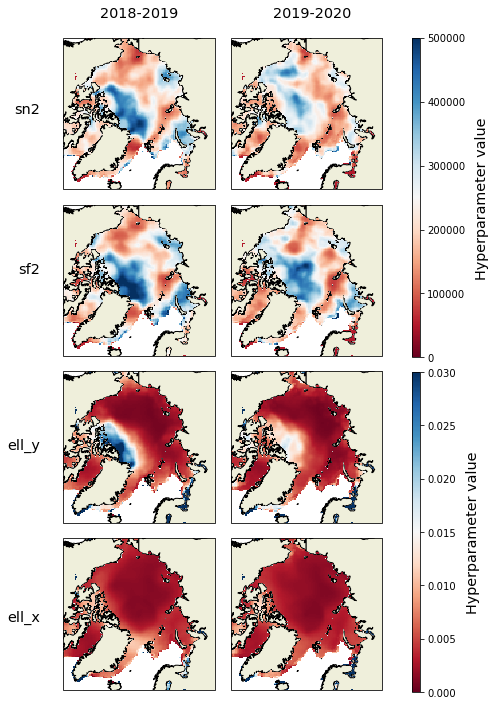

In [3]:
lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

data = [ell_x_smth_all_mean_2018_2019,ell_x_smth_all_mean_2019_2020,ell_y_smth_all_mean_2018_2019,ell_y_smth_all_mean_2019_2020,sf2_smth_all_mean_2018_2019,sf2_smth_all_mean_2019_2020,sn2_smth_all_mean_2018_2019,sn2_smth_all_mean_2019_2020]
# nums = ['a) ','b) ','c) ','d) ','e) ','f) ','g) ','h) ']
params = ['ell_x', 'ell_y', 'sf2', 'sn2']
ys = [0.21,0.75,1.3,1.8]

fig = plt.figure(figsize=(6,12))
spec = gridspec.GridSpec(ncols=2, nrows=4,hspace=0.1,wspace=0.)

for counter, ax in enumerate(data):
    fb = data[counter]
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    if counter < 4:
        p_map = ax.pcolormesh(lons,lats,fb,cmap='RdBu',vmin=0,vmax=500000,transform=ccrs.PlateCarree())
    else:
        p_map = ax.pcolormesh(lons,lats,fb,cmap='RdBu',vmin=0,vmax=0.03,transform=ccrs.PlateCarree())
#     ax.set_title(nums[counter],x = -0.01,y = 1,fontsize='x-large',fontweight="bold", pad=7)
    if counter == 3:
        cbar_ax = fig.add_axes([0.95, 0.51, 0.02, 0.37]) # x, y, width, height
        a = fig.colorbar(p_map, cax=cbar_ax)
        a.set_label("Hyperparameter value", fontsize = 'x-large',labelpad = 10)
    if counter == 7:
        cbar_ax = fig.add_axes([0.95, 0.123, 0.02, 0.37]) # x, y, width, height
        a = fig.colorbar(p_map, cax=cbar_ax)
        a.set_label("Hyperparameter value", fontsize = 'x-large',labelpad = 10)
for counter in np.arange(0,4):
    plt.annotate(params[counter],xy=(-43,ys[counter]),va='bottom',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('2018-2019',xy=(-27,2.1),va='bottom',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')
plt.annotate('2019-2020',xy=(-7,2.1),va='bottom',ha='right',xycoords='axes fraction',color='k', fontsize = 'x-large')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/hyperparameters.png',bbox_inches = "tight")

### compare long interp to short interp fb results CS2S3_CPOM

In [20]:
season='2019-2020'
date='20200115'

## long interp load data 
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_S3_GPOD/long_interpolation'
f = open(datapath+'/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
data = pickle.load(f)
f.close()
#print(data)
long_interp_one=[]
long_interp_one.extend(data[date+'_interp']) 

## short interp load data
datapath='/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_S3_GPOD/MERGE/'
short_interp_one = np.load(datapath+'FB_interp_'+season+'_50km_'+date+'.npy')

season='2019-2020'
date='20200310'

## long interp load data 
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_S3_GPOD/long_interpolation'
f = open(datapath+'/FBinterp_'+date+'_50km_9dayT_hindcast_300kmiter_nonzeroMatern.pkl','rb')
data = pickle.load(f)
f.close()
#print(data)
long_interp_two=[]
long_interp_two.extend(data[date+'_interp']) 

## short interp load data
datapath='/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_S3_GPOD/MERGE/'
short_interp_two = np.load(datapath+'FB_interp_'+season+'_50km_'+date+'.npy')

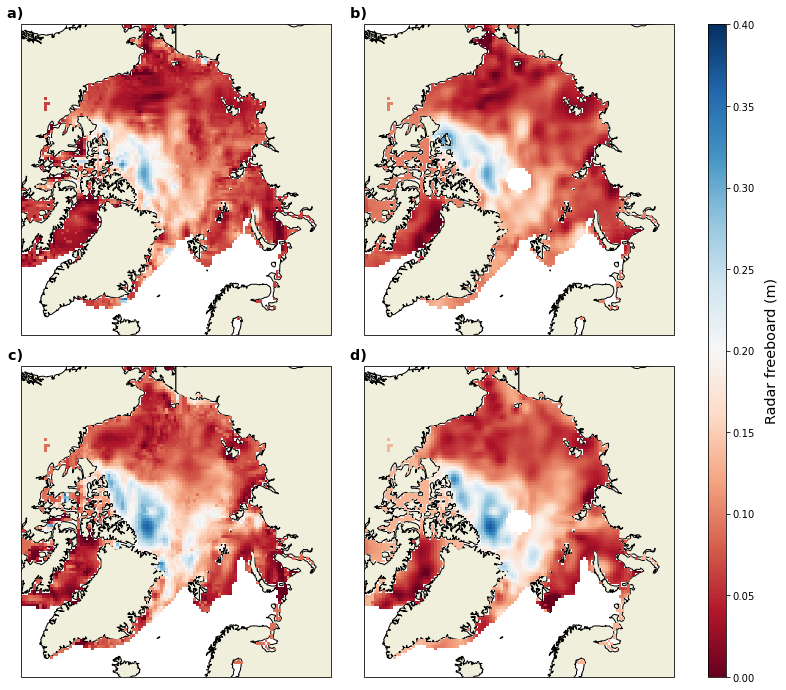

In [21]:
nums = ['a) ','b) ','c) ','d) ']

data = [long_interp_one,short_interp_one,long_interp_two,short_interp_two]

fig = plt.figure(figsize=(12,12))
spec = gridspec.GridSpec(ncols=2, nrows=2,wspace=0.05,hspace=0.1)

for counter, ax in enumerate(data):
    fb = data[counter]
    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,fb,cmap='RdBu',vmin=0,vmax=0.4,transform=ccrs.PlateCarree())
    if counter == 3:
        cbar_ax = fig.add_axes([0.93, 0.125, 0.02, 0.755]) # x, y, width, height
        a = fig.colorbar(p_map, cax=cbar_ax)
        a.set_label("Radar freeboard (m)", fontsize = 'x-large',labelpad = 10)
    ax.set_title(nums[counter],x = -0.01,y = 1,fontsize='x-large',fontweight="bold", pad=7)
    
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/long_interp.png',bbox_inches = "tight")